In [147]:
# Fonots

# Használathoz fel kell tölteni a metric_____.log filét ha Google Colabon használod.

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from datetime import datetime, date, time

from tensorflow import keras
from tensorflow.keras import layers

from sklearn.linear_model import LinearRegression

print(tf.__version__)

import time
ost = time.time()

ost = time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())
print(ost)

ost = time.strftime("%H:%M:%S", time.gmtime())
print(ost)

2.10.0
2023-04-30 12:25:57
12:25:57


In [96]:
metric_file_name = 'metric_train_by_none.log'

In [97]:
df = pd.read_csv(metric_file_name, sep=',', header=0)

In [98]:
df.head()

,worker_give_metrics,write_to_csv_time,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,...,[NUMA:0]Mapped,[NUMA:0]Anon,[NUMA:0]AnonH,[NUMA:0]Inactive,[NUMA:0]Hits,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs
0,192.168.0.170,10:27:24,10:27:2,4042.55730,2313.897845,1,5.8,96.4,0.9,99.1,...,0.0,31.2,32.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,192.168.0.170,10:27:34,10:27:3,2016.02450,1037.741364,1,5.5,96.0,0.7,99.3,...,0.0,40.6,38.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,192.168.0.170,10:27:44,10:27:4,7459.59195,4233.257538,1,5.2,95.9,0.9,99.1,...,0.0,38.4,36.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,192.168.0.170,10:27:54,10:27:5,10517.01750,3743.313127,2,7.1,97.4,0.4,99.6,...,0.0,24.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,192.168.0.170,10:28:03,10:28:0,5647.82210,3332.122743,1,7.0,95.8,0.8,99.2,...,0.0,41.1,38.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
df['worker_give_metrics'].unique()

array(['192.168.0.170'], dtype=object)

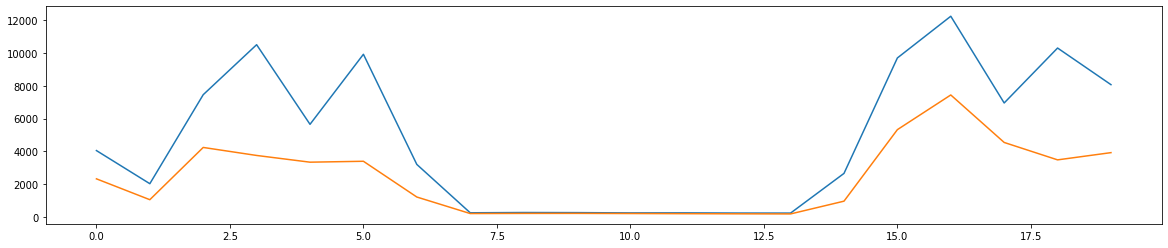

In [100]:
plt.figure(figsize=(20,4))
plt.plot(df['response_time_p95'])
plt.plot(df['response_time'])
plt.show()

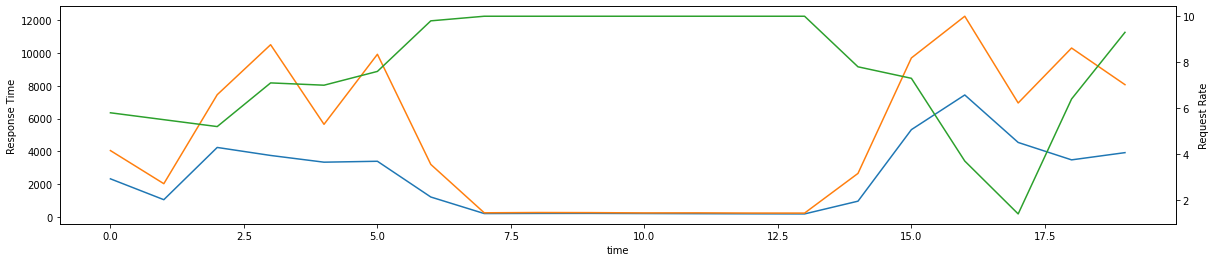

In [101]:

fig, ax1 = plt.subplots(figsize=(20, 4))

ax1.plot(df['response_time'], label = 'RT', color = 'C0')
ax1.plot(df['response_time_p95'], label = 'RT95%', color = 'C1')

ax2 = ax1.twinx()

ax2.plot(df['request_rate'], label = 'RR', color = 'C2')

ax1.set_xlabel('time')
ax1.set_ylabel('Response Time')
ax2.set_ylabel('Request Rate')

plt.show()

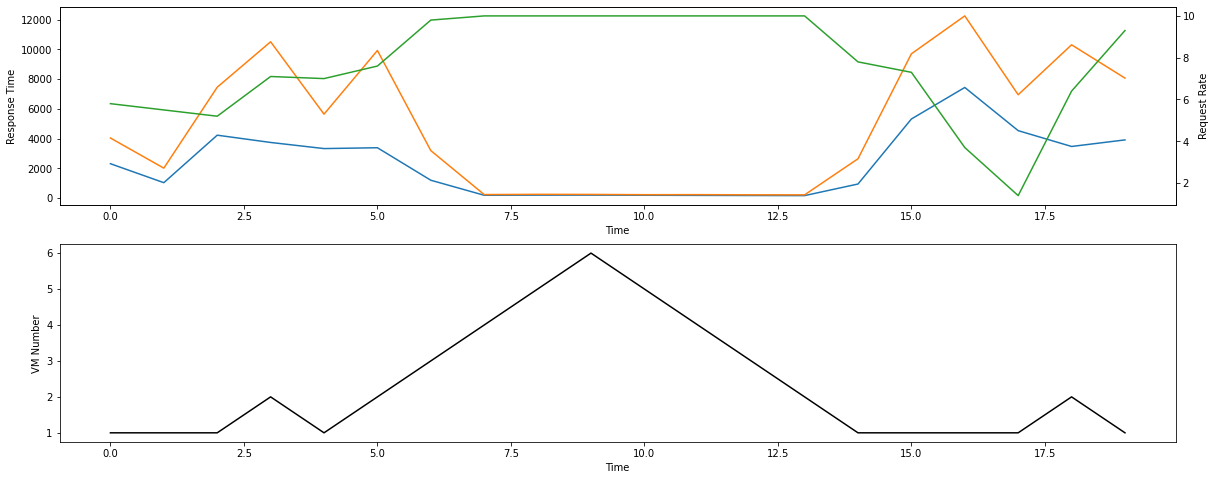

In [102]:

fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 8))

ax1.plot(df['response_time'], color = 'C0')
ax1.plot(df['response_time_p95'], color = 'C1')

ax2 = ax1.twinx()

ax2.plot(df['request_rate'], color = 'C2')

ax1.set_xlabel('Time')
ax1.set_ylabel('Response Time')
ax2.set_ylabel('Request Rate')

ax3.plot(df['worker_number'], color = 'black')
ax3.set_xlabel('Time')
ax3.set_ylabel('VM Number')

plt.show()

In [103]:
df.iloc[:, 0:7].describe()

,response_time_p95,response_time,worker_number,request_rate
count,20.000000,20.000000,20.000000,20.000000
mean,4720.111870,2309.863871,2.350000,7.695000
std,4313.922836,2158.674315,1.631112,2.482672
min,218.808450,167.948650,1.000000,1.400000
25%,244.894225,197.073130,1.000000,6.250000
50%,3619.039350,1757.727718,2.000000,7.700000
75%,8481.773900,3786.417622,3.250000,10.000000
max,12257.813000,7443.025622,6.000000,10.000000


In [104]:
df.columns

Index(['worker_give_metrics', 'write_to_csv_time', 'time', 'response_time_p95',
       'response_time', 'worker_number', 'request_rate', 'CPU0User%',
       'CPU0Idle%', 'CPU0Total%', 'CPU1User%', 'CPU1Idle%', 'CPU1Total%',
       '[DSK:sda]Reads', '[DSK:sda]RMerge', '[DSK:sda]RKBytes',
       '[DSK:sda]WaitR', '[DSK:sda]Writes', '[DSK:sda]WMerge',
       ' [DSK:sda]WKBytes', '[DSK:sda]WaitW', '[DSK:sda]Request',
       '[DSK:sda]QueLen', '[DSK:sda]Wait', '[DSK:sda]SvcTim', '[DSK:sda]Util',
       '[NUMA:0]Used', '[NUMA:0]Free', '[NUMA:0]Slab', '[NUMA:0]Mapped',
       '[NUMA:0]Anon', '[NUMA:0]AnonH', '[NUMA:0]Inactive', ' [NUMA:0]Hits',
       '[TCPD]InReceives', '[TCPD]InDelivers', '[TCPD]OutRequests',
       '[TCPD]InSegs', '[TCPD]OutSegs'],
      dtype='object')

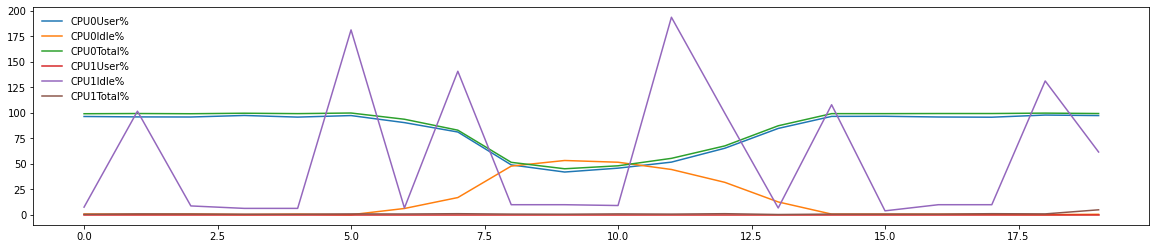

In [105]:
plt.figure(figsize=(20, 4))

for col_name in df.columns:
    if 'CPU' in col_name:
        plt.plot(df[col_name], label = col_name)

plt.legend(frameon=False)
plt.show()

In [106]:
df.iloc[:, 7:13].describe()

,CPU0User%,CPU0Idle%,CPU0Total%,CPU1User%,CPU1Idle%,CPU1Total%
count,20.000000,20.000000,20.000000,20.0,20.000000,20.000000
mean,83.435000,13.645000,86.195000,0.0,55.670000,1.075000
std,20.235489,19.944752,20.225088,0.0,65.627049,0.946392
min,42.000000,0.200000,45.200000,0.0,4.000000,0.400000
25%,77.225000,0.700000,79.150000,0.0,7.400000,0.775000
50%,95.850000,0.850000,99.150000,0.0,10.000000,0.850000
75%,96.525000,20.725000,99.300000,0.0,103.175000,1.000000
max,97.800000,53.300000,99.800000,0.0,193.600000,5.000000


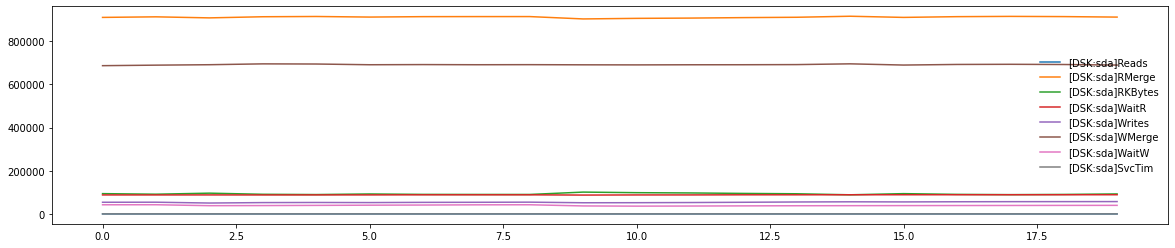

In [107]:
plt.figure(figsize=(20, 4))

for col_name in df.columns:
    if 'DSK' in col_name:
        if df[col_name].describe()[2] > 0:
            plt.plot(df[col_name], label = col_name)

plt.legend(frameon=False)
plt.show()

In [108]:
df.iloc[:, 13:26].describe()

,[DSK:sda]Reads,[DSK:sda]RMerge,[DSK:sda]RKBytes,[DSK:sda]WaitR,[DSK:sda]Writes,[DSK:sda]WMerge,[DSK:sda]WKBytes,[DSK:sda]WaitW,[DSK:sda]Request,[DSK:sda]QueLen,[DSK:sda]Wait,[DSK:sda]SvcTim,[DSK:sda]Util
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.0,20.000000,20.0,20.0,20.0,20.000000,20.0
mean,1.515000,911921.660000,92790.340000,88365.040000,54164.660000,691718.800000,0.0,39305.580000,100.0,0.0,0.0,28.270000,0.0
std,1.625868,3356.700433,3356.700433,441.579412,1913.595772,2021.628042,0.0,2000.801816,0.0,0.0,0.0,8.377294,0.0
min,0.400000,903620.800000,88617.600000,87341.600000,50430.000000,687029.600000,0.0,36050.000000,100.0,0.0,0.0,14.700000,0.0
25%,0.775000,910482.600000,90255.900000,88006.700000,52668.300000,690923.200000,0.0,38101.700000,100.0,0.0,0.0,23.275000,0.0
50%,0.850000,912829.800000,91882.200000,88484.400000,53969.200000,691414.000000,0.0,38994.200000,100.0,0.0,0.0,28.900000,0.0
75%,1.425000,914456.100000,94229.400000,88790.900000,55732.900000,692477.100000,0.0,40645.100000,100.0,0.0,0.0,34.075000,0.0
max,6.100000,916094.400000,101091.200000,88906.800000,57150.000000,695525.600000,0.0,42545.600000,100.0,0.0,0.0,41.100000,0.0


In [109]:
df.iloc[:, 26:34].describe()

,[NUMA:0]Used,[NUMA:0]Free,[NUMA:0]Slab,[NUMA:0]Mapped,[NUMA:0]Anon,[NUMA:0]AnonH,[NUMA:0]Inactive,[NUMA:0]Hits
count,20.0,20.0,20.0,20.0,20.000000,20.000000,20.0,20.0
mean,0.0,0.0,0.0,0.0,28.270000,28.160000,0.0,0.0
std,0.0,0.0,0.0,0.0,8.377294,7.711263,0.0,0.0
min,0.0,0.0,0.0,0.0,14.700000,14.200000,0.0,0.0
25%,0.0,0.0,0.0,0.0,23.275000,24.625000,0.0,0.0
50%,0.0,0.0,0.0,0.0,28.900000,29.350000,0.0,0.0
75%,0.0,0.0,0.0,0.0,34.075000,33.725000,0.0,0.0
max,0.0,0.0,0.0,0.0,41.100000,38.500000,0.0,0.0


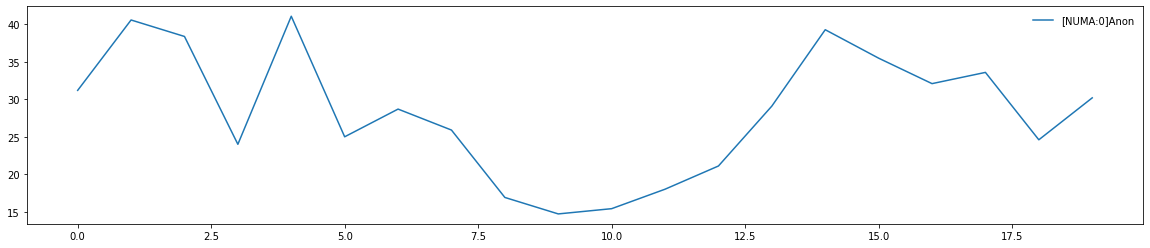

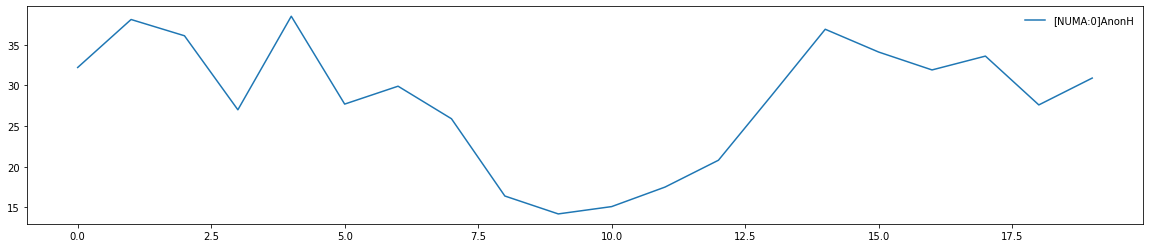

In [110]:
for col_name in df.columns:
    if 'NUMA' in col_name:
        if df[col_name].describe()[2] > 0:
            plt.figure(figsize=(20, 4))
            plt.ticklabel_format(useOffset=False)
            plt.ticklabel_format(style='plain')
            plt.plot(df[col_name], label = col_name)
            plt.legend(frameon=False)
            plt.show()

No handles with labels found to put in legend.


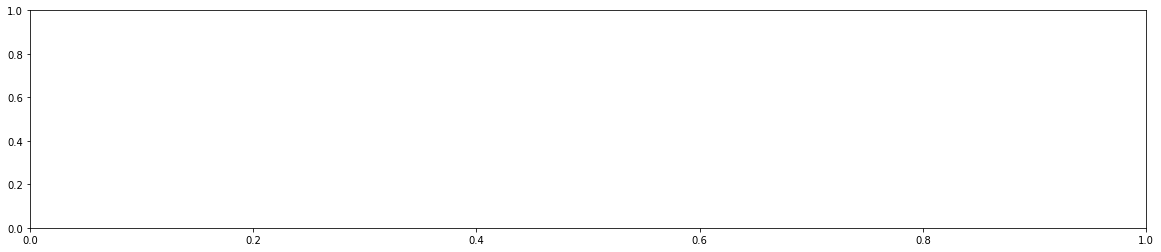

In [111]:
plt.figure(figsize=(20, 4))

for col_name in df.columns:
    if 'TCP' in col_name:
        if df[col_name].describe()[2] > 0:
            plt.plot(df[col_name], label = col_name)

plt.legend(frameon=False)
plt.show()

## CPU Threshod és Response Time Threshold

Két féle skálázást csináltam azonos terheléssel.

A két féle skálázásból származó log filokat beolvasom és összehasonlítom.

In [112]:
train_log_file_name  = 'scaled_train_by_none.log'

In [113]:
cf = pd.read_csv(train_log_file_name, sep=',', header=0)

In [114]:
print(cf.count()[0])

15


In [115]:
cf['otime'] = cf['time']

cf['time'] = cf['otime'].str[:-1]

In [116]:
cf.head()

,time,notification,actual_vm_number_was,actual_vm_number_is,otime
0,10:27:4,Worker 192.168.0.116 added.,1,2,10:27:44
1,10:27:5,Worker 192.168.0.116 removed.,2,1,10:27:54
2,10:28:0,Worker 192.168.0.116 added.,1,2,10:28:03
3,10:28:1,Worker 192.168.0.46 added.,2,3,10:28:13
4,10:28:2,Worker 192.168.0.219 added.,3,4,10:28:21


In [117]:
cf['notification'].unique()

array(['Worker 192.168.0.116 added.', 'Worker 192.168.0.116 removed.',
       'Worker 192.168.0.46 added.', 'Worker 192.168.0.219 added.',
       'Worker 192.168.0.233 added.', 'Worker 192.168.0.230 added.',
       'Worker 192.168.0.46 removed.', 'Worker 192.168.0.219 removed.',
       'Worker 192.168.0.233 removed.', 'Worker 192.168.0.230 removed.'],
      dtype=object)

In [118]:
# ezt kell összeillesztenem a másik adatbázissal a time alapján

In [119]:
df.head()

,worker_give_metrics,write_to_csv_time,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,...,[NUMA:0]Mapped,[NUMA:0]Anon,[NUMA:0]AnonH,[NUMA:0]Inactive,[NUMA:0]Hits,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs
0,192.168.0.170,10:27:24,10:27:2,4042.55730,2313.897845,1,5.8,96.4,0.9,99.1,...,0.0,31.2,32.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,192.168.0.170,10:27:34,10:27:3,2016.02450,1037.741364,1,5.5,96.0,0.7,99.3,...,0.0,40.6,38.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,192.168.0.170,10:27:44,10:27:4,7459.59195,4233.257538,1,5.2,95.9,0.9,99.1,...,0.0,38.4,36.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,192.168.0.170,10:27:54,10:27:5,10517.01750,3743.313127,2,7.1,97.4,0.4,99.6,...,0.0,24.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,192.168.0.170,10:28:03,10:28:0,5647.82210,3332.122743,1,7.0,95.8,0.8,99.2,...,0.0,41.1,38.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [120]:
mf = df.merge(cf, on='time', how='left')

In [121]:
mf.head()

,worker_give_metrics,write_to_csv_time,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,...,[NUMA:0]Hits,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs,notification,actual_vm_number_was,actual_vm_number_is,otime
0,192.168.0.170,10:27:24,10:27:2,4042.55730,2313.897845,1,5.8,96.4,0.9,99.1,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,192.168.0.170,10:27:34,10:27:3,2016.02450,1037.741364,1,5.5,96.0,0.7,99.3,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,192.168.0.170,10:27:44,10:27:4,7459.59195,4233.257538,1,5.2,95.9,0.9,99.1,...,0.0,0.0,0.0,0.0,0.0,0.0,Worker 192.168.0.116 added.,1.0,2.0,10:27:44
3,192.168.0.170,10:27:54,10:27:5,10517.01750,3743.313127,2,7.1,97.4,0.4,99.6,...,0.0,0.0,0.0,0.0,0.0,0.0,Worker 192.168.0.116 removed.,2.0,1.0,10:27:54
4,192.168.0.170,10:28:03,10:28:0,5647.82210,3332.122743,1,7.0,95.8,0.8,99.2,...,0.0,0.0,0.0,0.0,0.0,0.0,Worker 192.168.0.116 added.,1.0,2.0,10:28:03


In [122]:
mf['delta_vm'] = mf['actual_vm_number_is'] - mf['actual_vm_number_was']

In [123]:
mf.head()

,worker_give_metrics,write_to_csv_time,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,...,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs,notification,actual_vm_number_was,actual_vm_number_is,otime,delta_vm
0,192.168.0.170,10:27:24,10:27:2,4042.55730,2313.897845,1,5.8,96.4,0.9,99.1,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,192.168.0.170,10:27:34,10:27:3,2016.02450,1037.741364,1,5.5,96.0,0.7,99.3,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,192.168.0.170,10:27:44,10:27:4,7459.59195,4233.257538,1,5.2,95.9,0.9,99.1,...,0.0,0.0,0.0,0.0,0.0,Worker 192.168.0.116 added.,1.0,2.0,10:27:44,1.0
3,192.168.0.170,10:27:54,10:27:5,10517.01750,3743.313127,2,7.1,97.4,0.4,99.6,...,0.0,0.0,0.0,0.0,0.0,Worker 192.168.0.116 removed.,2.0,1.0,10:27:54,-1.0
4,192.168.0.170,10:28:03,10:28:0,5647.82210,3332.122743,1,7.0,95.8,0.8,99.2,...,0.0,0.0,0.0,0.0,0.0,Worker 192.168.0.116 added.,1.0,2.0,10:28:03,1.0


In [124]:
mf.columns

Index(['worker_give_metrics', 'write_to_csv_time', 'time', 'response_time_p95',
       'response_time', 'worker_number', 'request_rate', 'CPU0User%',
       'CPU0Idle%', 'CPU0Total%', 'CPU1User%', 'CPU1Idle%', 'CPU1Total%',
       '[DSK:sda]Reads', '[DSK:sda]RMerge', '[DSK:sda]RKBytes',
       '[DSK:sda]WaitR', '[DSK:sda]Writes', '[DSK:sda]WMerge',
       ' [DSK:sda]WKBytes', '[DSK:sda]WaitW', '[DSK:sda]Request',
       '[DSK:sda]QueLen', '[DSK:sda]Wait', '[DSK:sda]SvcTim', '[DSK:sda]Util',
       '[NUMA:0]Used', '[NUMA:0]Free', '[NUMA:0]Slab', '[NUMA:0]Mapped',
       '[NUMA:0]Anon', '[NUMA:0]AnonH', '[NUMA:0]Inactive', ' [NUMA:0]Hits',
       '[TCPD]InReceives', '[TCPD]InDelivers', '[TCPD]OutRequests',
       '[TCPD]InSegs', '[TCPD]OutSegs', 'notification', 'actual_vm_number_was',
       'actual_vm_number_is', 'otime', 'delta_vm'],
      dtype='object')

In [125]:
mf['worker_number'].isnull().values.any()

False

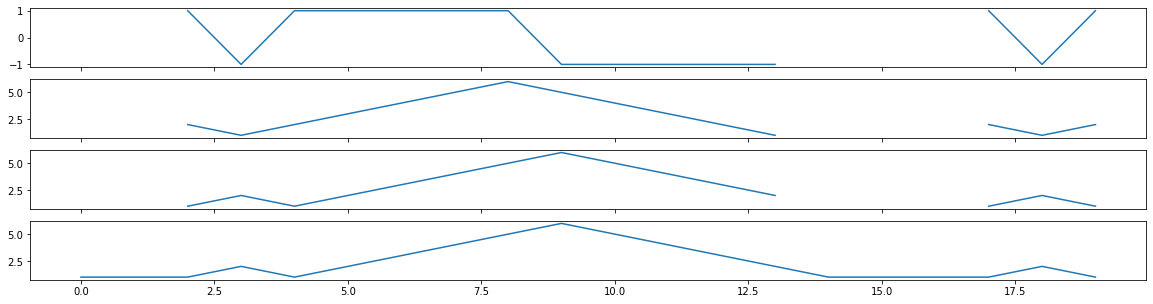

In [126]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 5), sharex=True)

ax1.plot(mf['delta_vm'])
ax2.plot(mf['actual_vm_number_is'])
ax3.plot(mf['actual_vm_number_was'])
ax4.plot(mf['worker_number'])

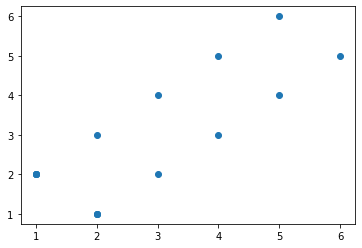

In [127]:
# Ellenőrzés (mert úgy tűnik, hogy a két adatbázisban az éppen aktuális VM szám mindhat egy kicsit mozogna)

plt.scatter(mf['worker_number'], mf['actual_vm_number_is'])

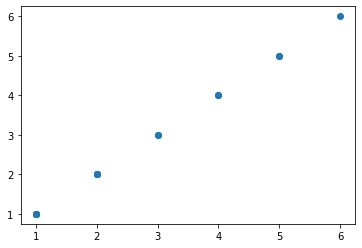

In [128]:
plt.scatter(mf['worker_number'], mf['actual_vm_number_was'])

In [129]:
# Ezt jó hogy megcsináltam (lásd a fenti ábrát)

# A 'actual_vm_number_was' == 'worker_number'

In [130]:
mf.columns

Index(['worker_give_metrics', 'write_to_csv_time', 'time', 'response_time_p95',
       'response_time', 'worker_number', 'request_rate', 'CPU0User%',
       'CPU0Idle%', 'CPU0Total%', 'CPU1User%', 'CPU1Idle%', 'CPU1Total%',
       '[DSK:sda]Reads', '[DSK:sda]RMerge', '[DSK:sda]RKBytes',
       '[DSK:sda]WaitR', '[DSK:sda]Writes', '[DSK:sda]WMerge',
       ' [DSK:sda]WKBytes', '[DSK:sda]WaitW', '[DSK:sda]Request',
       '[DSK:sda]QueLen', '[DSK:sda]Wait', '[DSK:sda]SvcTim', '[DSK:sda]Util',
       '[NUMA:0]Used', '[NUMA:0]Free', '[NUMA:0]Slab', '[NUMA:0]Mapped',
       '[NUMA:0]Anon', '[NUMA:0]AnonH', '[NUMA:0]Inactive', ' [NUMA:0]Hits',
       '[TCPD]InReceives', '[TCPD]InDelivers', '[TCPD]OutRequests',
       '[TCPD]InSegs', '[TCPD]OutSegs', 'notification', 'actual_vm_number_was',
       'actual_vm_number_is', 'otime', 'delta_vm'],
      dtype='object')

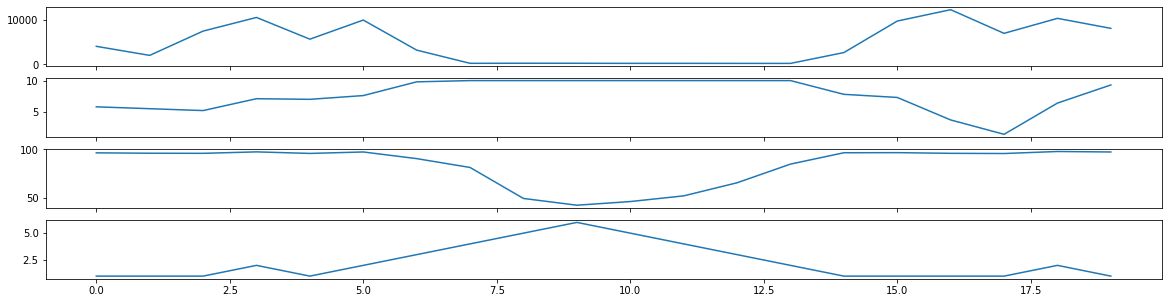

In [131]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 5), sharex=True)

ax1.plot(mf['response_time_p95'])
ax2.plot(mf['request_rate'])
ax3.plot(mf['CPU0User%'])
ax4.plot(mf['worker_number'])

In [132]:
mf.columns

Index(['worker_give_metrics', 'write_to_csv_time', 'time', 'response_time_p95',
       'response_time', 'worker_number', 'request_rate', 'CPU0User%',
       'CPU0Idle%', 'CPU0Total%', 'CPU1User%', 'CPU1Idle%', 'CPU1Total%',
       '[DSK:sda]Reads', '[DSK:sda]RMerge', '[DSK:sda]RKBytes',
       '[DSK:sda]WaitR', '[DSK:sda]Writes', '[DSK:sda]WMerge',
       ' [DSK:sda]WKBytes', '[DSK:sda]WaitW', '[DSK:sda]Request',
       '[DSK:sda]QueLen', '[DSK:sda]Wait', '[DSK:sda]SvcTim', '[DSK:sda]Util',
       '[NUMA:0]Used', '[NUMA:0]Free', '[NUMA:0]Slab', '[NUMA:0]Mapped',
       '[NUMA:0]Anon', '[NUMA:0]AnonH', '[NUMA:0]Inactive', ' [NUMA:0]Hits',
       '[TCPD]InReceives', '[TCPD]InDelivers', '[TCPD]OutRequests',
       '[TCPD]InSegs', '[TCPD]OutSegs', 'notification', 'actual_vm_number_was',
       'actual_vm_number_is', 'otime', 'delta_vm'],
      dtype='object')

In [133]:
ff = mf[['time', 'otime', 'response_time', 'worker_number', 'request_rate', 'CPU0User%', 'actual_vm_number_was', 'actual_vm_number_is', 'delta_vm']].copy()

In [134]:
ff.head()

,time,otime,response_time,worker_number,request_rate,CPU0User%,actual_vm_number_was,actual_vm_number_is,delta_vm
0,10:27:2,NaN,2313.897845,1,5.8,96.4,NaN,NaN,NaN
1,10:27:3,NaN,1037.741364,1,5.5,96.0,NaN,NaN,NaN
2,10:27:4,10:27:44,4233.257538,1,5.2,95.9,1.0,2.0,1.0
3,10:27:5,10:27:54,3743.313127,2,7.1,97.4,2.0,1.0,-1.0
4,10:28:0,10:28:03,3332.122743,1,7.0,95.8,1.0,2.0,1.0


In [41]:
f2 = ff.reset_index(drop=True) # nem használom, de ha le kéne resetelni az indexet

In [42]:
# cpu' = c0 + c1 * cpu * worker_number/(worker_number + delta_vm) + c2 * cpu * delta_vm/(worker_number + delta_vm)

# m'   = c0 + c1 · m · w/(w + k) + c2 · m · k/(w + k)

In [43]:
# A time a metrikához tartozik
# a otime a scalerhez
# 19:57:4 kor mérünk valamit (91.6)
# --> az is egy külön jó kérdés, hogy ez mikor kerül birásra a rendszerbe (19:57:4 (0) vagy (9))
# ----> megoldás lehet, hogy beteszek a scaler programba egy időbőjeget is, hogy mikor íra be ezt az adatot

# A sclaer 19:57:42-kor végrehajt egy skálázást

# Ennek az eredménye logikus, hogy csak a 19:57:5 metric mérésnél jelenhet meg

In [136]:
f1 = ff.copy()
f1['CPU0User%Next'] = f1['CPU0User%'].shift(-1)
f1['CPU0User%Prev'] = f1['CPU0User%'].shift(+1)
f1.head()

,time,otime,response_time,worker_number,request_rate,CPU0User%,actual_vm_number_was,actual_vm_number_is,delta_vm,CPU0User%Next,CPU0User%Prev
0,10:27:2,NaN,2313.897845,1,5.8,96.4,NaN,NaN,NaN,96.0,NaN
1,10:27:3,NaN,1037.741364,1,5.5,96.0,NaN,NaN,NaN,95.9,96.4
2,10:27:4,10:27:44,4233.257538,1,5.2,95.9,1.0,2.0,1.0,97.4,96.0
3,10:27:5,10:27:54,3743.313127,2,7.1,97.4,2.0,1.0,-1.0,95.8,95.9
4,10:28:0,10:28:03,3332.122743,1,7.0,95.8,1.0,2.0,1.0,97.3,97.4


In [137]:
# viszont csak ott kell figyelmebe venni a bf-af értéket ahol ténylegesen volt skálázás

In [138]:
f2 = f1.dropna()
f2.head(10)

,time,otime,response_time,worker_number,request_rate,CPU0User%,actual_vm_number_was,actual_vm_number_is,delta_vm,CPU0User%Next,CPU0User%Prev
2,10:27:4,10:27:44,4233.257538,1,5.2,95.9,1.0,2.0,1.0,97.4,96.0
3,10:27:5,10:27:54,3743.313127,2,7.1,97.4,2.0,1.0,-1.0,95.8,95.9
4,10:28:0,10:28:03,3332.122743,1,7.0,95.8,1.0,2.0,1.0,97.3,97.4
5,10:28:1,10:28:13,3387.872513,2,7.6,97.3,2.0,3.0,1.0,90.4,95.8
6,10:28:2,10:28:21,1201.557592,3,9.8,90.4,3.0,4.0,1.0,81.2,97.3
7,10:28:3,10:28:32,190.593960,4,10.0,81.2,4.0,5.0,1.0,49.0,90.4
8,10:28:4,10:28:42,198.788780,5,10.0,49.0,5.0,6.0,1.0,42.0,81.2
9,10:28:5,10:28:51,200.506280,6,10.0,42.0,6.0,5.0,-1.0,45.8,49.0
10,10:29:0,10:29:01,191.926180,5,10.0,45.8,5.0,4.0,-1.0,51.7,42.0
11,10:29:1,10:29:11,183.128240,4,10.0,51.7,4.0,3.0,-1.0,65.3,45.8


In [47]:
# cpu' = c0 + c1 * cpu * worker_number/(worker_number + delta_vm) + c2 * cpu * delta_vm/(worker_number + delta_vm)

# m'   = c0 + c1 · m · w/(w + k) + c2 · m · k/(w + k)

In [139]:
# Ez a jó

# A jelenlegi a lapján 'CPU0USer' becsüljük a következő értéket 'CPU0User%Next'

f3 = f2.copy()
f3['cpu_term1'] = f3['CPU0User%'] * f3['worker_number']/(f3['worker_number'] + f3['delta_vm'])
f3['cpu_term2'] = f3['CPU0User%'] * f3['delta_vm']/(f3['worker_number'] + f3['delta_vm'])

# --

_cpu_term = f3[['cpu_term1', 'cpu_term2']]          # jelenlegiekből összeállított term

_cpu_next = f3['CPU0User%Next']                    # a következő mérés értéke

print(_cpu_term.shape, _cpu_next.shape)

lr = LinearRegression(fit_intercept=True)

rr = lr.fit(_cpu_term, _cpu_next)

rr.score(_cpu_term, _cpu_next)

In [141]:
rr.coef_

array([0.85445423, 0.78527866])

In [142]:
rr.intercept_

10.86390335343792

In [143]:
pred_cpu = rr.predict(_cpu_term)

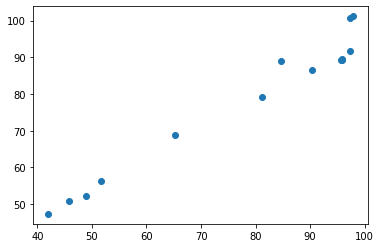

In [144]:
plt.scatter(f3['CPU0User%'], pred_cpu)

In [54]:
# Egy gyors ellenörzés -> hogy vátozna, ha a 'k' (delta_vm) számát én állítanám be

In [55]:
# m'   = c0 + c1 · m · w/(w + k) + c2 · m · k/(w + k)

In [146]:
_cpu_usage = 90
_actual_vm = 2
_delta_vm = 2

_t1 = _cpu_usage * _actual_vm/(_actual_vm + _delta_vm)
_t2 = _cpu_usage * _delta_vm/(_actual_vm + _delta_vm)

_x = np.array([[_t1, _t2]])

print(_x.shape)
print(_x)

_pred = rr.predict(_x)

print(_pred)

# Jó, a model azt mondja, hogy ha 1 darab VM-t hozzáadok akkor csökkenni fog a CPU Usage

(1, 2)
[[45. 45.]]
[84.65188318]


/home/ubuntu/notebook/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [154]:
from sklearn.linear_model import LinearRegression
    
def create_model_for_metric(columnname: str):
    
    f1 = mf.copy()
    __next_name = columnname + 'Next'
    __prev_name = columnname + 'Prev'

    f1[__next_name] = f1[columnname].shift(-1)
    f1[__prev_name] = f1[columnname].shift(+1)
    
    f1 = f1.dropna()
    
    __metric_term1 = columnname + '_term1'
    __metric_term2 = columnname + '_term2'
    f1[__metric_term1] = f1[columnname] * f1['worker_number']/(f1['worker_number'] + f1['delta_vm'])
    f1[__metric_term2] = f1[columnname] * f1['delta_vm']/(f1['worker_number'] + f1['delta_vm'])
    
    __metric_term = f1[[__metric_term1, __metric_term2]]
    __metric_next = f1[__next_name]

    lr = LinearRegression(fit_intercept=True)

    rr = lr.fit(__metric_term, __metric_next)

    __fit_score = rr.score(__metric_term, __metric_next)
    
    __fit_coef_ = rr.coef_
    
    __fit_intercept_ = rr.intercept_
    
    __pred_metric = rr.predict(__metric_term)
    
    plt.scatter(f1[columnname], __pred_metric)

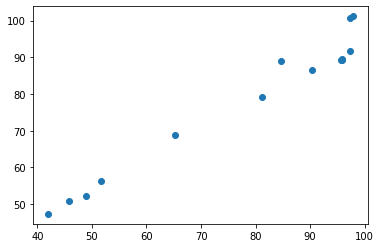

In [155]:
create_model_for_metric('CPU0User%')

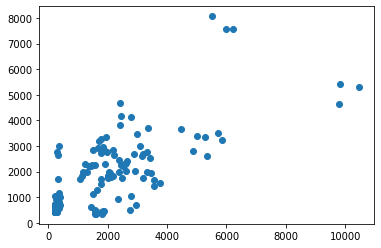

In [101]:
create_model_for_metric('response_time_p95')

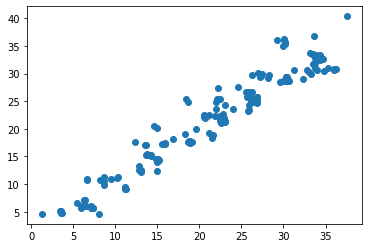

In [102]:
create_model_for_metric('request_rate')

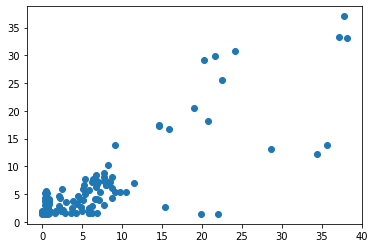

In [103]:
create_model_for_metric('CPU0Idle%')

In [96]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [104]:
cn = mf.columns

interact(create_model_for_metric, columnname=cn);

interactive(children=(Dropdown(description='columnname', options=('worker_give_metrics', 'write_to_csv_time', …

In [119]:
# Csak kiviből kipróbálom, hogy milyen érkeket adna az ő linreg beállításaikkal (nem tom melyik, melyik metric)

bvalues = [[1,0,0],
           [0.9448,0.1072,3.0954],
           [0.8954,0.3220,42.3307],
           [1.1008,0.4017,-20.2569],
           [1.0589,0.5713,1.5306],
           [0.6142,0.1733,26.5175],
           [0.9222,0.2059,1.1572],
           [0.7489,0.2851,18.4977]]

# metrics[i]=np.dot(bvalues[i],[(metrics[i]*w)/(w+k),(metrics[i]*k)/(w+k),1])

metrics = [90, 90, 90, 90, 90, 90]
w = 3
k = 1

m = 1

_cpu = np.dot(bvalues[m],[(metrics[m]*w)/(w+k),(metrics[m]*k)/(w+k),1])

print(_cpu)

# Mivel nem tudom, hogy melyik együtthatótk tartoznak a cpu-hoz ezért nem merem biztosan kijelenteni,
# de úgy tűnik, hogy náluk ha egy VM-t hozzáadok akkor csökken a CPU usage érték és nem nő.

# Ennek lehet az az oka is, hogy a Fibonacci CPU REST API-n tanítottam

69.2814


In [ ]:

# Csak úgy mondom, hogy gyárilag a Request Rate értéket is becsülni kell a linreg modellel

# Ennek az az oka, hogy mivel elosztott terhelés van, valóban előforudhat és elő is fordul,
# hogy ha egy új VM-t becsatolok a rendszerbe akkor az adott gépre kevesebb bejövő kérés
# fog jutni.


In [122]:
mf.columns

Index(['worker_give_metrics', 'write_to_csv_time', 'time', 'response_time_p95',
       'response_time', 'worker_number', 'request_rate', 'CPU0User%',
       'CPU0Idle%', 'CPU0Total%', 'CPU1User%', 'CPU1Idle%', 'CPU1Total%',
       '[DSK:sda]Reads', '[DSK:sda]RMerge', '[DSK:sda]RKBytes',
       '[DSK:sda]WaitR', '[DSK:sda]Writes', '[DSK:sda]WMerge',
       ' [DSK:sda]WKBytes', '[DSK:sda]WaitW', '[DSK:sda]Request',
       '[DSK:sda]QueLen', '[DSK:sda]Wait', '[DSK:sda]SvcTim', '[DSK:sda]Util',
       '[NUMA:0]Used', '[NUMA:0]Free', '[NUMA:0]Slab', '[NUMA:0]Mapped',
       '[NUMA:0]Anon', '[NUMA:0]AnonH', '[NUMA:0]Inactive', ' [NUMA:0]Hits',
       '[TCPD]InReceives', '[TCPD]InDelivers', '[TCPD]OutRequests',
       '[TCPD]InSegs', '[TCPD]OutSegs', 'notification', 'actual_vm_number_was',
       'actual_vm_number_is', 'otime', 'delta_vm'],
      dtype='object')

In [125]:
import tensorflow as tf
tf.get_logger().setLevel('INFO')

In [136]:


train_features = mf[['request_rate', 'CPU0User%', '[DSK:sda]Reads', '[NUMA:0]Anon', '[NUMA:0]AnonH']]

train_labels = mf[['response_time_p95']]

train_labels = mf[['response_time']]


normalizer = tf.keras.layers.Normalization(axis=-1)

normalizer.adapt(np.array(train_features))

print(normalizer.mean.numpy())

first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
    print('First example:', first)
    print('Normalized   :', normalizer(first).numpy())

first_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(3),
    layers.Dense(units=1)
])

first_model.summary()

first_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')


[[19.416613 88.36346  11.377742 30.24485  29.666449]]
First example: [[ 1.2 39.1 38.1 15.  14.3]]
Normalized   : [[-1.72 -3.35  2.16 -2.64 -2.74]]
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_12 (Normaliza  (None, 5)                11        
 tion)                                                           
                                                                 
 dense_9 (Dense)             (None, 5)                 30        
                                                                 
 dense_10 (Dense)            (None, 3)                 18        
                                                                 
 dense_11 (Dense)            (None, 1)                 4         
                                                                 
Total params: 63
Trainable params: 52
Non-trainable params: 11
__________________________________________

In [141]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    # plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [RT]')
    plt.legend()
    plt.grid(True)

CPU times: user 4.48 s, sys: 162 ms, total: 4.64 s
Wall time: 4.28 s


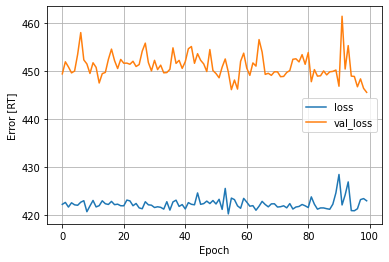

In [142]:
%%time
history = first_model.fit(
    train_features,
    train_labels,
    epochs = 100,
    verbose = 0,
    validation_split = 0.2)

plot_loss(history)

In [143]:
# https://www.tensorflow.org/tutorials/keras/regression